<a href="https://colab.research.google.com/github/denverkim/Uzbek/blob/main/21_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# Install libraries
!pip install pandas langchain langchain-openai langchain-experimental

In [47]:
# Load a Pandas DataFrame
import pandas as pd

df = pd.read_csv("/content/card.csv")
df.head()

,ID,Name,Age,Gender,Education,Income,City,Month,Status
0,1001,Alice,29,Female,Bachelor,48000,New York,2023-01,0
1,1001,Alice,29,Female,Bachelor,48000,New York,2023-02,0
2,1002,Bob,35,Male,Master,72000,San Francisco,2023-01,1
3,1002,Bob,35,Male,Master,72000,San Francisco,2023-02,0
4,1003,Charlie,42,Male,PhD,96000,Boston,2023-01,0


In [48]:
# Setup API Key
from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

In [49]:
# Load LLM
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model="gpt-4",   # or "gpt-3.5-turbo"
    temperature=0,
    api_key=OPENAI_API_KEY,
    streaming=True
)

In [42]:
# Create DataFrame Agent
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

agent = create_pandas_dataframe_agent(
    llm,
    df,
    verbose=True,
    allow_dangerous_code=True   # ✅ Allow Python code execution
)


# Natural Language Data Analysis

In [50]:
# Natural Language Data Analysis
print(agent.run("How many rows and columns are in the dataframe?"))
print(agent.run("Show the average age of applicants."))
print(agent.run("How many applicants are from the city named 'X' ?"))
print(agent.run("Calculate average income by education level."))



> Entering new AgentExecutor chain...
Thought: To find out the number of rows and columns in a dataframe, we can use the `shape` attribute of the dataframe.
Action: python_repl_ast
Action Input: df.shape(12, 9)The dataframe has 12 rows and 9 columns.
Final Answer: The dataframe has 12 rows and 9 columns.

> Finished chain.
The dataframe has 12 rows and 9 columns.


> Entering new AgentExecutor chain...
Thought: To find the average age of applicants, I need to calculate the mean of the 'Age' column in the dataframe.
Action: python_repl_ast
Action Input: df['Age'].mean()34.416666666666664The average age of applicants is approximately 34.42 years.
Final Answer: The average age of applicants is approximately 34.42 years.

> Finished chain.
The average age of applicants is approximately 34.42 years.


> Entering new AgentExecutor chain...
Thought: To answer this question, I need to filter the dataframe where the 'City' column is equal to 'X' and then count the number of rows in the filter

# Additional Questions

In [51]:
print(agent.run("How many unique cities are in the dataset?"))



> Entering new AgentExecutor chain...
Thought: To find the number of unique cities in the dataset, I can use the `unique()` function on the 'City' column of the dataframe. This function will return an array of unique values in the column. I can then use the `len()` function to count the number of unique values.
Action: python_repl_ast
Action Input: len(df['City'].unique())7I now know the final answer.
Final Answer: There are 7 unique cities in the dataset.

> Finished chain.
There are 7 unique cities in the dataset.


In [52]:
print(agent.run("Which education level has the highest average income?"))



> Entering new AgentExecutor chain...
Thought: To find out which education level has the highest average income, I need to group the data by 'Education' and then calculate the mean of 'Income' for each group. The group with the highest mean income is the education level with the highest average income.
Action: python_repl_ast
Action Input: df.groupby('Education')['Income'].mean().idxmax()PhDThe education level with the highest average income is PhD.
Final Answer: PhD

> Finished chain.
PhD


In [55]:
print(agent.run("How many applicants have a status of 1 in their credit record?"))



> Entering new AgentExecutor chain...
Thought: To find out how many applicants have a status of 1 in their credit record, I need to filter the dataframe where the 'Status' column equals 1 and then count the number of rows.
Action: python_repl_ast
Action Input: df[df['Status'] == 1].shape[0]4I now know the final answer.
Final Answer: There are 4 applicants who have a status of 1 in their credit record.

> Finished chain.
There are 4 applicants who have a status of 1 in their credit record.


In [56]:
print(agent.run("What is the average income of applicants with a status of 1 in credit history?"))



> Entering new AgentExecutor chain...
Thought: To find the average income of applicants with a status of 1 in credit history, we need to filter the dataframe to only include rows where the 'Status' column is 1, then calculate the mean of the 'Income' column.
Action: python_repl_ast
Action Input: df[df['Status'] == 1]['Income'].mean()66250.0I now know the final answer.
Final Answer: The average income of applicants with a status of 1 in credit history is 66250.0.

> Finished chain.
The average income of applicants with a status of 1 in credit history is 66250.0.




> Entering new AgentExecutor chain...
Thought: To plot a bar chart of average income by education level, I first need to group the data by 'Education' and calculate the mean of 'Income'. Then, I can use the plot function from pandas to create the bar chart.
Action: python_repl_ast
Action Input: df.groupby('Education')['Income'].mean().plot(kind='bar')Axes(0.125,0.11;0.775x0.77)The command executed successfully and a bar chart was plotted. However, I can't see the plot in this text-based environment. I assume it correctly displays the average income by education level.
Final Answer: To plot a bar chart of average income by education level, you can use the following command: `df.groupby('Education')['Income'].mean().plot(kind='bar')`. This command groups the data by 'Education', calculates the mean of 'Income' for each group, and plots the results in a bar chart.

> Finished chain.
To plot a bar chart of average income by education level, you can use the following command: `df.groupby(

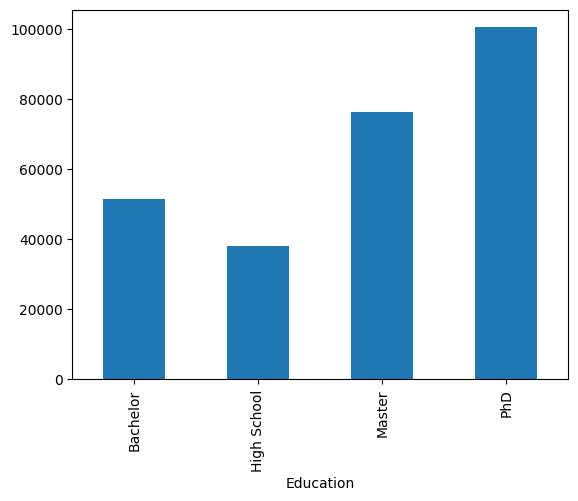

In [57]:
print(agent.run("Plot a bar chart of average income by education level."))